In [1]:
from typing import Dict, Optional
import os

import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr

from xcube.core.store import new_data_store
from xcube.core.select import select_variables_subset

In [2]:
clip_repo_name = "clip_07_europe_is_heating_up"

In [3]:
from init_nb import ws_path, cliplib
clip_dir = ws_path / clip_repo_name
clip_data_dir = clip_dir / "data"
clip_cache_dir = clip_data_dir / "temp"
if not clip_cache_dir.exists():
    clip_cache_dir.mkdir()

Open CCI Zarr store and list contents:

In [4]:
odp_store = new_data_store("cciodp")

In [5]:
# list(cz_store.get_data_ids())

Open LST dataset

In [6]:
odp_store.describe_data('esacci.LST.mon.L3C.LST.MODIS.Aqua.MODISA.3-00.DAY')

In [7]:
odp_store.get_open_data_params_schema()

In [8]:
lst_dataset = odp_store.open_data('esacci.LST.mon.L3C.LST.MODIS.Aqua.MODISA.3-00.DAY', variable_names=["lst"])
lst_dataset

<xarray.Dataset>
Dimensions:    (channel: 2, lat: 18000, lon: 36000, time: 198, bnds: 2)
Coordinates:
  * channel    (channel) float64 11.0 12.0
  * lat        (lat) float32 -90.0 -89.99 -89.98 -89.97 ... 89.97 89.98 89.99
  * lon        (lon) float32 -180.0 -180.0 -180.0 -180.0 ... 180.0 180.0 180.0
  * time       (time) datetime64[ns] 2002-07-16T12:00:00 ... 2018-12-16T12:00:00
    time_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(198, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    lst        (time, lat, lon) float32 dask.array<chunksize=(1, 1000, 1000), meta=np.ndarray>
Attributes:
    Conventions:             CF-1.7
    title:                   esacci.LST.mon.L3C.LST.MODIS.Aqua.MODISA.3-00.DAY
    date_created:            2023-01-12T15:58:49.039849
    processing_level:        L3C
    time_coverage_start:     2002-07-01T00:00:00
    time_coverage_end:       2019-01-01T00:00:00
    time_coverage_duration:  P6028DT0H0M0S
    history:                 [{'program': 'xcube_cci.chunkstore.CciChunkStore...

## LST coarsened to 0.1 degrees

In [9]:
#lst_dataset_01 = lst_dataset.coarsen(dim=dict(lon=10, lat=10)).mean()

In [10]:
#lst_dataset_01 = lst_dataset_01.chunk(time=1, lat=1000, lon=1000)

In [11]:
#lst_dataset_01.to_zarr(f"{clip_cache_dir}/lst_dataset_01.zarr", mode="w")

In [12]:
# lst_dataset_01 = xr.open_zarr(f"{clip_cache_dir}/lst_annual_mean_01.zarr")
# lst_dataset_01

## Load the main cities of Europe

In [13]:
cities = pd.read_csv(clip_data_dir / "capital_city_coordinates.csv")
cities

,City,Country,Latitude,Longitude
0,Berlin,Germany,52.520007,13.404954
1,Paris,France,48.856614,2.352222
2,Rome,Italy,41.902783,12.496365
3,Madrid,Spain,40.416775,-3.703790
4,Warsaw,Poland,52.229676,21.012229
5,Bucharest,Romania,44.426767,26.102538
6,Amsterdam,Netherlands,52.367573,4.904139
7,Brussels,Belgium,50.847642,4.357170
8,Prague,Czech Republic,50.075538,14.437800
9,Athens,Greece,37.983810,23.727539


In [15]:
lst_cities = pd.DataFrame(dict(time=lst_dataset.time))
lst_cities.set_index("time", inplace=True)
for i, city in cities.iterrows():
    city_name = city["City"]
    country_name = city["Country"]
    lon = city["Longitude"]
    lat = city["Latitude"]
    lst = lst_dataset.lst.sel(lon=lon, lat=lat, method="nearest")    
    lst_cities[city_name] = lst
    display(f'Got time-series for {city["City"]} / {city["Country"]}')

'Got time-series for Berlin / Germany'

'Got time-series for Paris / France'

'Got time-series for Rome / Italy'

'Got time-series for Madrid / Spain'

'Got time-series for Warsaw / Poland'

'Got time-series for Bucharest / Romania'

'Got time-series for Amsterdam / Netherlands'

'Got time-series for Brussels / Belgium'

'Got time-series for Prague / Czech Republic'

'Got time-series for Athens / Greece'

'Got time-series for Stockholm / Sweden'

'Got time-series for Lisbon / Portugal'

'Got time-series for Budapest / Hungary'

'Got time-series for Vienna / Austria'

'Got time-series for Sofia / Bulgaria'

'Got time-series for Copenhagen / Denmark'

'Got time-series for Helsinki / Finland'

'Got time-series for Bratislava / Slovakia'

'Got time-series for Dublin / Ireland'

'Got time-series for Zagreb / Croatia'

'Got time-series for Vilnius / Lithuania'

'Got time-series for Ljubljana / Slovenia'

'Got time-series for Riga / Latvia'

'Got time-series for Tallinn / Estonia'

'Got time-series for Nicosia / Cyprus'

'Got time-series for Luxembourg / Luxembourg'

'Got time-series for Valletta / Malta'

In [16]:
lst_cities

,time,Berlin,Paris,Rome,Madrid,Warsaw,Bucharest,Amsterdam,Brussels,Prague,...,Bratislava,Dublin,Zagreb,Vilnius,Ljubljana,Riga,Tallinn,Nicosia,Luxembourg,Valletta
0,2002-07-16 12:00:00,308.899994,312.970001,314.209991,317.579987,307.760010,317.019989,306.850006,312.019989,310.429993,...,309.019989,299.660004,309.289978,309.130005,307.419983,306.929993,302.660004,324.489990,306.429993,307.729980
1,2002-08-16 12:00:00,307.089996,306.899994,310.809998,314.929993,306.079987,308.029999,305.720001,306.229980,305.350006,...,307.059998,300.160004,306.579987,305.829987,307.220001,305.470001,302.779999,322.389984,302.690002,309.199982
2,2002-09-16 00:00:00,298.369995,300.039978,302.660004,305.369995,297.059998,303.649994,297.799988,296.839996,297.720001,...,300.130005,295.470001,299.739990,296.899994,297.859985,298.160004,293.339996,316.779999,292.209991,305.410004
3,2002-10-16 12:00:00,286.339996,290.009979,297.779999,294.829987,282.209991,294.179993,286.279999,288.989990,286.829987,...,287.829987,285.910004,292.709991,282.720001,288.399994,280.609985,277.630005,309.479980,285.289978,300.720001
4,2002-11-16 00:00:00,276.739990,286.039978,290.039978,287.829987,277.220001,288.259979,283.589996,282.750000,280.399994,...,282.299988,282.750000,286.750000,272.509979,284.339996,273.320007,269.949982,302.369995,280.540009,295.529999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,2018-08-16 12:00:00,309.639984,312.010010,313.940002,318.979980,307.639984,314.449982,306.809998,310.190002,312.160004,...,310.919983,297.829987,311.919983,305.910004,311.579987,306.229980,302.199982,325.760010,308.880005,309.410004
194,2018-09-16 00:00:00,301.630005,302.799988,307.500000,310.380005,301.289978,307.059998,295.259979,300.089996,301.079987,...,302.660004,297.559998,303.100006,296.509979,301.959991,297.559998,292.880005,320.320007,298.759979,307.859985
195,2018-10-16 12:00:00,294.989990,297.910004,299.750000,301.449982,291.869995,298.259979,291.239990,295.199982,294.199982,...,294.820007,286.649994,295.720001,288.940002,293.419983,287.589996,284.529999,308.299988,295.500000,300.630005
196,2018-11-16 00:00:00,281.329987,284.789978,291.329987,289.459991,279.119995,287.649994,283.399994,284.690002,279.500000,...,283.269989,282.289978,285.169983,274.889984,284.779999,274.660004,274.889984,300.600006,280.449982,295.850006


In [37]:
lst_cities.set_index("time", inplace=True)

<AxesSubplot: xlabel='time'>

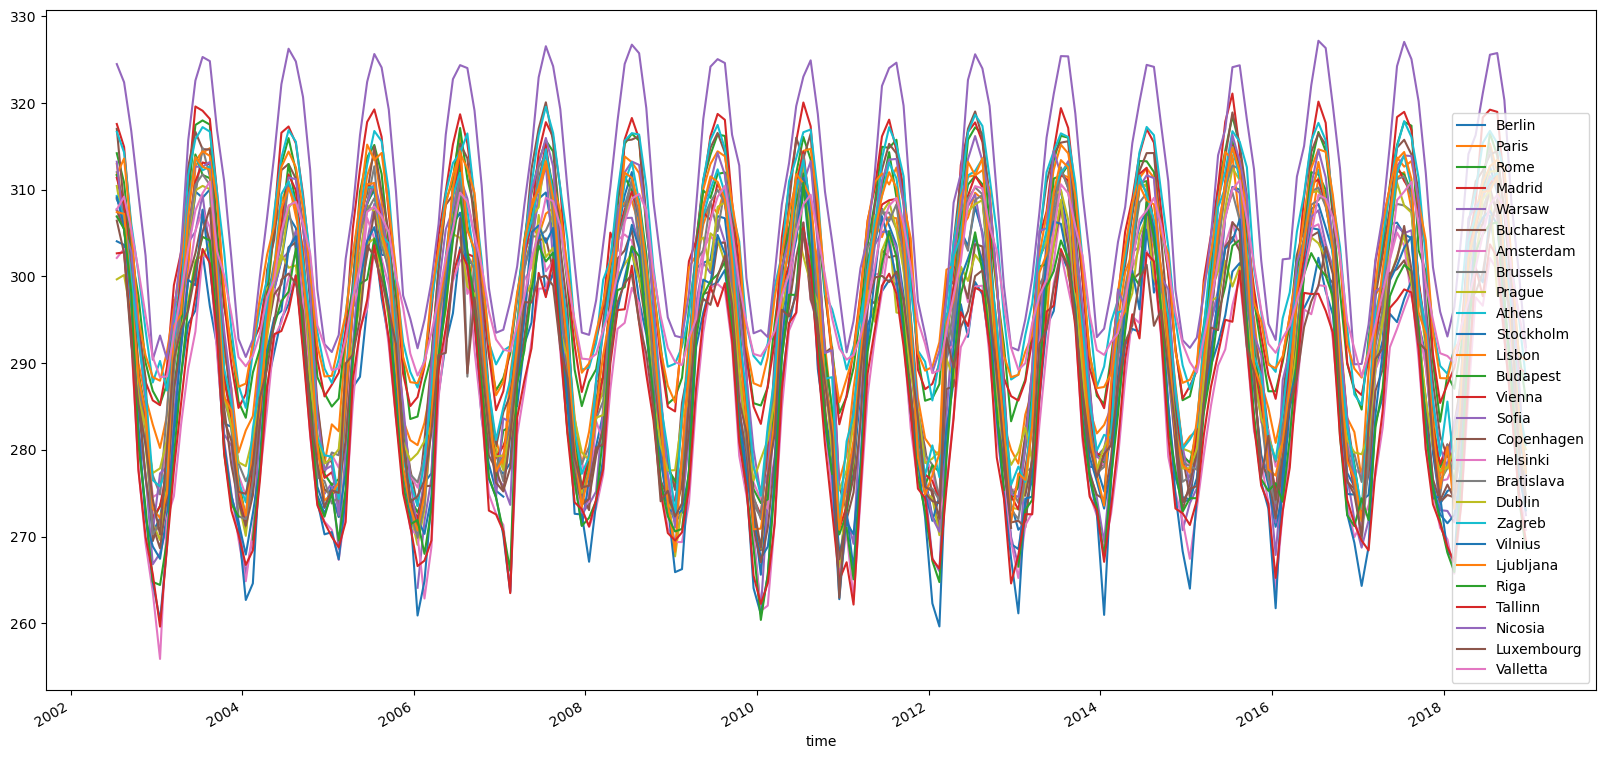

In [39]:
lst_cities.plot(figsize=(20, 10))

In [43]:
lst_cities["month"] = lst_dataset.time.dt.month

In [44]:
lst_cities.to_csv(clip_data_dir / "capital_city_lst.csv")

In [45]:
pd.read_csv(clip_data_dir / "capital_city_lst.csv", index_col="time")

,Berlin,Paris,Rome,Madrid,Warsaw,Bucharest,Amsterdam,Brussels,Prague,Athens,...,Dublin,Zagreb,Vilnius,Ljubljana,Riga,Tallinn,Nicosia,Luxembourg,Valletta,month
time,,,,,,,,,,,,,,,,,,,,,
2002-07-16 12:00:00,308.90000,312.97000,314.21000,317.58000,307.76000,317.02000,306.85000,312.02000,310.43000,316.66998,...,299.66000,309.28998,309.13000,307.41998,306.93000,302.66000,324.49000,306.43000,307.72998,7
2002-08-16 12:00:00,307.09000,306.90000,310.81000,314.93000,306.08000,308.03000,305.72000,306.22998,305.35000,314.30000,...,300.16000,306.58000,305.83000,307.22000,305.47000,302.78000,322.38998,302.69000,309.19998,8
2002-09-16 00:00:00,298.37000,300.03998,302.66000,305.37000,297.06000,303.65000,297.80000,296.84000,297.72000,306.09000,...,295.47000,299.74000,296.90000,297.86000,298.16000,293.34000,316.78000,292.21000,305.41000,9
2002-10-16 12:00:00,286.34000,290.00998,297.78000,294.83000,282.21000,294.18000,286.28000,288.99000,286.83000,300.37000,...,285.91000,292.71000,282.72000,288.40000,280.61000,277.63000,309.47998,285.28998,300.72000,10
2002-11-16 00:00:00,276.74000,286.03998,290.03998,287.83000,277.22000,288.25998,283.59000,282.75000,280.40000,293.77000,...,282.75000,286.75000,272.50998,284.34000,273.32000,269.94998,302.37000,280.54000,295.53000,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-16 12:00:00,309.63998,312.01000,313.94000,318.97998,307.63998,314.44998,306.81000,310.19000,312.16000,315.38000,...,297.83000,311.91998,305.91000,311.58000,306.22998,302.19998,325.76000,308.88000,309.41000,8
2018-09-16 00:00:00,301.63000,302.80000,307.50000,310.38000,301.28998,307.06000,295.25998,300.09000,301.08000,311.91000,...,297.56000,303.10000,296.50998,301.96000,297.56000,292.88000,320.32000,298.75998,307.86000,9
2018-10-16 12:00:00,294.99000,297.91000,299.75000,301.44998,291.87000,298.25998,291.24000,295.19998,294.19998,301.22000,...,286.65000,295.72000,288.94000,293.41998,287.59000,284.53000,308.30000,295.50000,300.63000,10


In [51]:
lst_12 = lst_cities[lst_cities["month"] == 12]
lst_12_mean = lst_12.mean()

array([<AxesSubplot: xlabel='time'>, <AxesSubplot: xlabel='time'>,
       <AxesSubplot: xlabel='time'>, <AxesSubplot: xlabel='time'>,
       <AxesSubplot: xlabel='time'>, <AxesSubplot: xlabel='time'>,
       <AxesSubplot: xlabel='time'>, <AxesSubplot: xlabel='time'>,
       <AxesSubplot: xlabel='time'>, <AxesSubplot: xlabel='time'>,
       <AxesSubplot: xlabel='time'>, <AxesSubplot: xlabel='time'>,
       <AxesSubplot: xlabel='time'>, <AxesSubplot: xlabel='time'>,
       <AxesSubplot: xlabel='time'>, <AxesSubplot: xlabel='time'>,
       <AxesSubplot: xlabel='time'>, <AxesSubplot: xlabel='time'>,
       <AxesSubplot: xlabel='time'>, <AxesSubplot: xlabel='time'>,
       <AxesSubplot: xlabel='time'>, <AxesSubplot: xlabel='time'>,
       <AxesSubplot: xlabel='time'>, <AxesSubplot: xlabel='time'>,
       <AxesSubplot: xlabel='time'>, <AxesSubplot: xlabel='time'>,
       <AxesSubplot: xlabel='time'>, <AxesSubplot: xlabel='time'>],
      dtype=object)

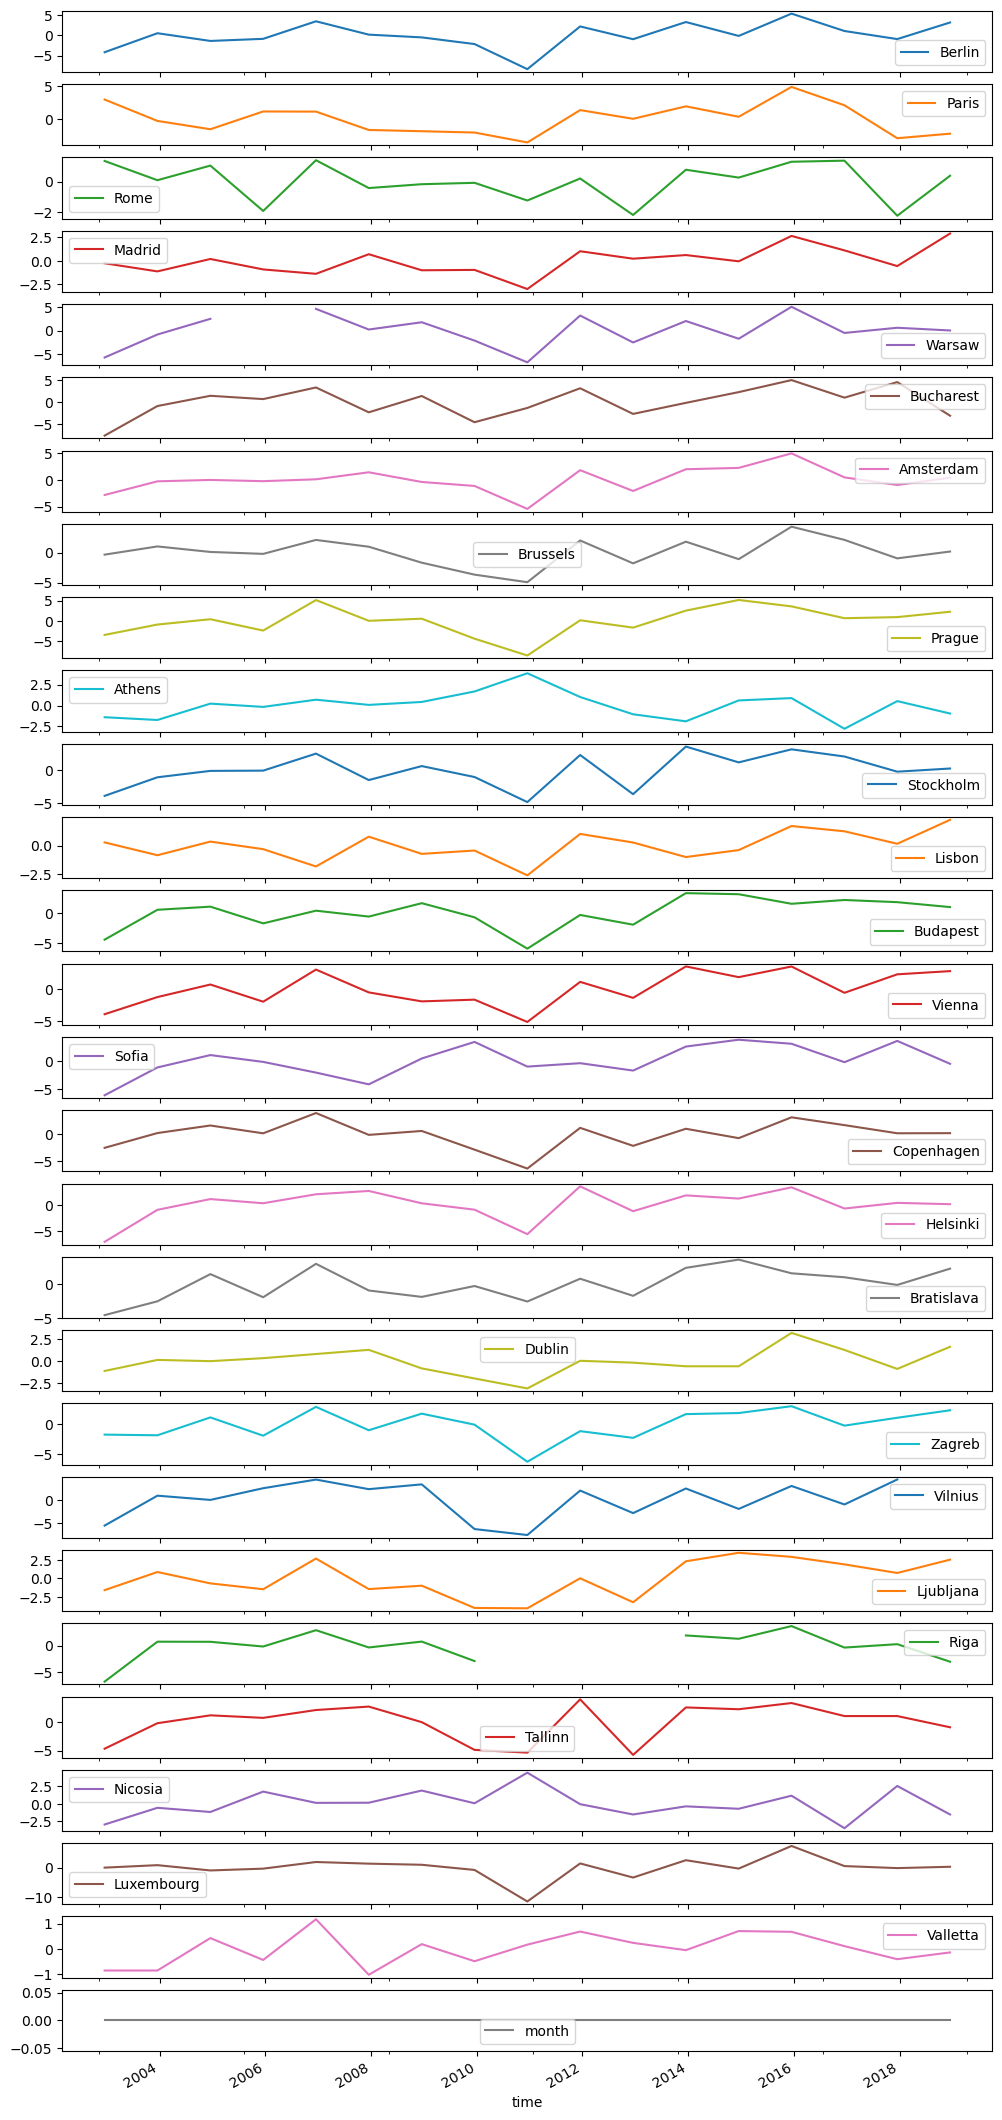

In [52]:
(lst_12 - lst_12_mean).plot(figsize=(12, 30), subplots=True)